### Линейная алгебра. Лабораторная работа 1, зима 2025, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [604]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [605]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [606]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [607]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [608]:
A = np.diag([1, 2, 3, 4, 5])
A

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [609]:
np.trace(A)

15

In [610]:
sla.inv(A)

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [611]:
X = np.random.rand(4, 5)
X

array([[0.99827392, 0.16447769, 0.49569154, 0.87362873, 0.49329015],
       [0.54355365, 0.10344536, 0.23631393, 0.87349845, 0.32673902],
       [0.17338553, 0.77302827, 0.42668258, 0.15456861, 0.57947074],
       [0.09660862, 0.55751417, 0.56251366, 0.51539065, 0.92161836]])

In [612]:
sla.det(X[np.ix_([1, 2], [0,1])])

0.4022464085901762

In [613]:
np.dot(X.T, X)

array([[1.33139716, 0.40831449, 0.75160949, 1.42350519, 0.859547  ],
       [0.40831449, 0.94614861, 0.74942282, 0.6408753 , 1.07669743],
       [0.75160949, 0.74942282, 0.80003402, 0.99533623, 1.08740573],
       [1.42350519, 0.6408753 , 0.99533623, 1.81574568, 1.28091995],
       [0.859547  , 1.07669743, 1.08740573, 1.28091995, 1.53526031]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [639]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if (X.shape[0] != X.shape[1]):
        raise ValueError()

    det = 1
    X = X.astype(float)
    n = X.shape[0]

    # буду делать верхнетреугольную матрицу и считать ее определитель как произведение чисел на диагонали
    for i in range(n):
        swap_row = i
        for j in range(i, n):
            if X[j, i] >= X[swap_row, i]:
                swap_row = j

        if swap_row != i:
            X[[swap_row, i]] = X[[i, swap_row]]
            det *= -1
        
        if X[i, i] == 0:
            return 0
        
        for k in range(i + 1, n):
            X[k, i:] -= X[i, i:] / X[i, i] * X[k, i]
        
    det *= np.prod(np.diag(X))
    
    return det

Простая проверка:

In [640]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [641]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

6.78 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
154 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
231 µs ± 7.33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
14.9 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
139 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1.85 s ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


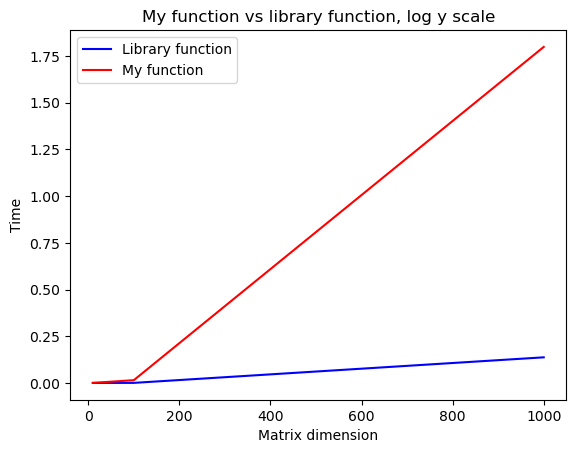

In [642]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

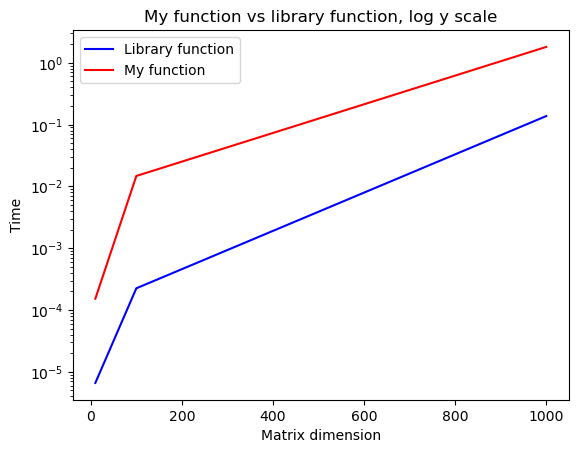

In [643]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [619]:
# Your code here
first = np.dot([[1, 0], [10 ** 20, 1]], [[10 ** -20, 1], [0, 1 - 10 ** 20]])
second = np.dot([[1., 0.], [10. ** 20, 1.]], [[10. ** -20, 1.], [0., 1. - 10. ** 20]])

print(first)
print(second)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Первый правильный!!!!!!!!!!!!!!!!!!!

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [620]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    
    # Your code here
    # не знаю как правильно, но я считаю что i и j начинаются с 0
    P[0, :] = 1
    P[:, 0] = 1
    P[1, :] = 1
    P[1] += np.arange(0, dim)
    for i in range(2, dim):
        for j in range(1, dim):
            P[i, j] = P[i - 1, j] + P[i, j - 1]
    return P

X = my_pascal(5)
X

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  3.,  6., 10., 15.],
       [ 1.,  4., 10., 20., 35.],
       [ 1.,  5., 15., 35., 70.]])

Чему равен её определитель? Обязательно объясните свой ответ.

----
Определитель всегда равен 1. 

Пусть $dim = n$, тогда википедия подсказывает рассмотреть матрицы:
$$
L=
\begin{pmatrix}
\binom{0}{0} & 0 & 0 & \dots & 0\\\\
\binom{1}{0} & \binom{1}{1} & 0 & \dots & 0\\\\
\binom{2}{0} & \binom{2}{1} & \binom{2}{2} & \dots & 0\\\\
\vdots & \vdots & \vdots & \ddots & \vdots\\\\
\binom{n-1}{0} & \binom{n-1}{1} & \binom{n-1}{2} & \dots & \binom{n-1}{n-1}
\end{pmatrix}, \ \ \

R=L^T=
\begin{pmatrix}
\binom{0}{0} & \binom{1}{0} & \binom{2}{0} & \dots & \binom{n-1}{0}\\\\
0 & \binom{1}{1} & \binom{2}{1} & \dots & \binom{n-1}{1}\\\\
0 & 0 & \binom{2}{2} & \dots & \binom{n-2}{2}\\\\
\vdots & \vdots & \vdots & \ddots & \vdots\\\\
0 & 0 & 0 & \dots & \binom{n-1}{n-1}
\end{pmatrix}
$$

$LR_{ij} = \sum\limits_{k=0}^{n} \binom{i}{k} \cdot \binom{j}{k}=P_{ij}$ (Если $k > i$, то $\binom{i}{k}=0$, для $j$ аналогично). Я не придумал как это доказать нормально без махания руками, а кучу элементарных преобразований я не успею затехать...

Тогда из мультипликативности определителя:
$$
det(P) = det(LR) = det(L) \cdot det(R) = 1 \cdot 1 = 1
$$,

т.к $L$ и $R$ это нижнетреугольная и верхнетреугольная матрицы соответственно и на главное диагонали у них стоят единицы

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [621]:
print(sla.det(my_pascal(30)))
print(sla.det(sla.pascal(30)))

-4.748149909176051e+49
-4.748149909176051e+49


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [622]:
def prod_and_sq_sum(A):
    prod = np.prod(np.diag(A))
    sq_sum = np.sum(np.square(np.diag(A)))
    return (prod, sq_sum)

print(prod_and_sq_sum(np.array([[1, 2, 10], [4, 5, 6], [7, 8, 99]])))
print(5 * 99, 1 + 25 + 99 ** 2)

print(prod_and_sq_sum(np.array([[10**6, 29492, 328923], [424, 0, 213412], [754, 8283, 234]])))
print(10**6 * 0 * 234, 10**12 + 234**2)

(495, 9827)
495 9827
(0, 1000000054756)
0 1000000054756


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}a_ib_i^T$$

In [623]:
def f(A, B, k):
    m = np.shape(A)[0]
    mn = min(k, np.shape(A)[1])
    A = A[:, :mn].T
    B = B[:, :mn].T

    A = A.reshape(mn, m, 1)
    B = B.reshape(mn, 1, m)

    return np.sum(A * B, axis=0)
    
    

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
B = np.array([[5, 3, 7, 1], [6, 4, 8, 7], [4, 1, 2, 9]])
# a1 = [1 5 9], a2 = [2 6 10], a3 = [3 7 11], a4 = [4 8 12]
# b1 = [5 6 4], b2 = [3 4 1], b3 = [7 8 2], b4 = [1 7 9]
# k = n = 4:
f(A, B, 4)

array([[ 36,  66,  48],
       [100, 166, 112],
       [164, 266, 176]])

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [624]:
def get_diag(A, B):
    B = B.T
    return np.sum(A * B, axis=1)

A = np.array([[1, 2, 3], [5, 6, 7], [9, 10, 11]])
B = np.array([[5, 3, 7], [6, 4, 8], [4, 1, 2]])

print(get_diag(A, B))
print(np.diag(np.dot(A, B)))

[ 29  46 165]
[ 29  46 165]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [625]:
def shrink_rotate(x, a, coef=1., angle=0.):
    return (x - a) * coef * np.exp(1j * angle) + a

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return np.conjugate((x - a) * coef * np.exp(1j * angle)) + a
    
def geometric_inverse(x, a, r):
    if x == a:
        return np.inf
    return r ** 2 / np.conjugate(x - a) + a

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

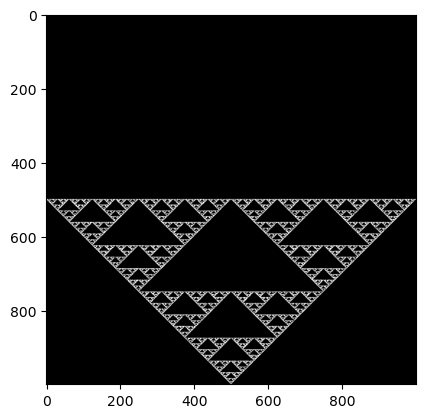

In [626]:
pix = np.zeros((1000, 1000))

z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        i = np.real(z)
        j = np.imag(z)
        pix[int((1 + j) * 500), int((1 + i) * 500)] = 1

plt.imshow(pix, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
а с чего бы ей не получиться

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

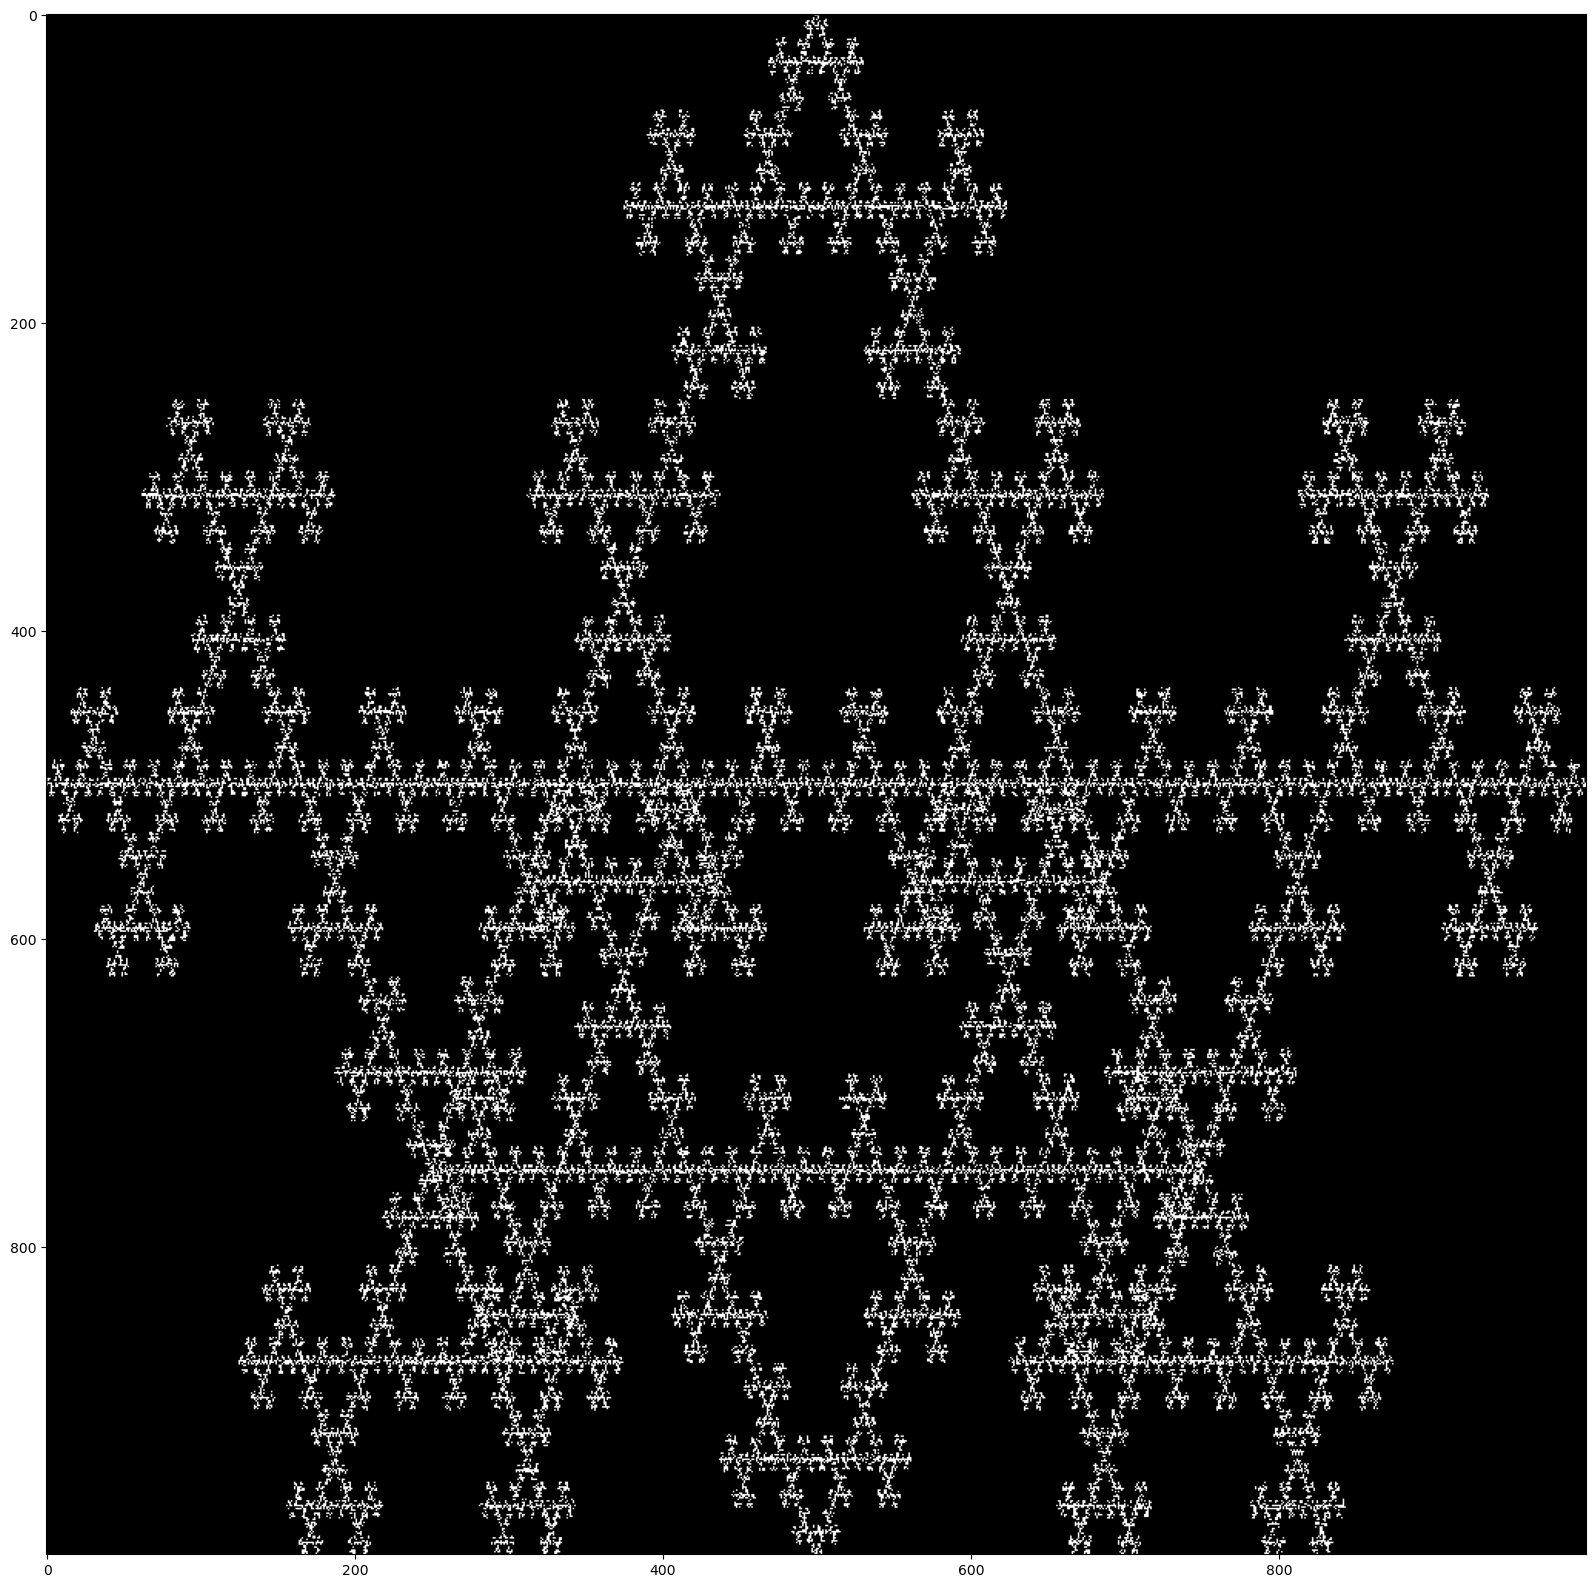

In [627]:
pix2 = np.zeros((1000, 1000))
z = -0.5 - 0.5*1j
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.)),
]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        i = np.real(z)
        j = np.imag(z)
        pix2[int((1 - j) * 500), int((1 + i) * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(pix2, cmap='gray')

P.S: у меня не получилось красиво и я устал поэтому оставлю так 

## Часть 6. Функции от матриц

### Пусть $A$ -- некоторая квадратная матрица.

В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать разными способами. Ниже мы покажем два из них, один символьный и один численный.

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 241:

`A = Matrix([[4,4,4,1],[5,7,6,2],[-8,-6,-6,-3],[-1,-6,-5,1]])`

- у группы 242:

`A = Matrix([[-1,1,1,1],[-3,2,1,2],[-2,3,3,-2],[-2,1,1,2]])`

- у группы 243:

`A = Matrix([[2,1,-3,-2],[1,2,2,1],[2,-2,8,3],[-2,4,-8,-2]])`

- у группы 244:

`A = Matrix([[-3,3,-2,1],[-7,6,-5,4],[-2,1,-4,6],[-2,1,-5,7]])`

- у группы 245:

`A = Matrix([[4,3,3,1],[-7,-7,-8,-3],[2,3,5,1],[6,7,6,4]])`
 
В этом задании надо пользоваться [библиотекой](https://www.sympy.org/) `sympy` для символьных вычислений. Вам понадобятся:
- [sympy.symbol](https://docs.sympy.org/latest/modules/core.html#module-sympy.core.symbol) для генерации буквенных выражений.
- Для работы с многочленами смотреть [сюда](https://docs.sympy.org/latest/modules/polys/basics.html#polynomials).
- Для работы с символьными матрицами [сюда](https://docs.sympy.org/latest/modules/matrices/index.html).

Посчитайте указанным способом (все вычисления должны быть символьными):
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. Но я настоятельно рекомендую использовать `sympy`.

$f(x) = (x^2 - 3x + 2)^2 =(x-1)^2 \cdot (x-2)^2$, т.е нужно только значение самой функции и первая производная в двух точках

In [628]:
import sympy as sp

def pleasedostuff(A, func):
    x, a0, a1, a2, a3 = sp.symbols("x a0 a1 a2 a3")
    g = a3*x**3 + a2*x**2 + a1*x + a0 * x ** 0
    system = [sp.Eq(g.subs(x, 1), func(1)), sp.Eq(g.subs(x, 2), func(2)), 
              sp.Eq(sp.diff(g, x).subs(x, 1), sp.diff(func(x), x).subs(x, 1)), 
              sp.Eq(sp.diff(g, x).subs(x, 2), sp.diff(func(x), x).subs(x, 2))]
    
    a0 = sp.solve(system)[a0]
    a1 = sp.solve(system)[a1]
    a2 = sp.solve(system)[a2]
    a3 = sp.solve(system)[a3]
    g = a3*x**3 + a2*x**2 + a1*x
    E = sp.eye(4)
    
    return g.subs(x, A) + a0 * E

A = sp.Matrix([[-3,3,-2,1],[-7,6,-5,4],[-2,1,-4,6],[-2,1,-5,7]])


In [629]:
B = pleasedostuff(A, sp.exp)
B

Matrix([
[-4*exp(2) + 6*E, -4*E + 3*exp(2),            -4*E, -exp(2) + 6*E],
[-7*exp(2) + 9*E, -6*E + 5*exp(2), -2*exp(2) - 5*E,  exp(2) + 8*E],
[-2*exp(2) + 3*E,   -2*E + exp(2), -4*exp(2) + 2*E, -E + 5*exp(2)],
[-2*exp(2) + 3*E,   -2*E + exp(2),    E - 4*exp(2),      5*exp(2)]])

In [630]:
S = pleasedostuff(A, sp.sin)
S

Matrix([
[  -5*sin(2) + cos(2) + 6*sin(1),   -4*sin(1) - cos(2) + 4*sin(2), -2*sin(1) - 2*cos(1) - 2*cos(2) + 2*sin(2), -4*sin(2) + 3*cos(2) + 2*cos(1) + 4*sin(1)],
[-9*sin(2) + 2*cos(2) + 9*sin(1), -6*sin(1) - 2*cos(2) + 7*sin(2), -2*sin(1) - 3*cos(1) - 4*cos(2) + 2*sin(2), -5*sin(2) + 6*cos(2) + 3*cos(1) + 5*sin(1)],
[  -3*sin(2) + cos(2) + 3*sin(1),   -2*sin(1) - cos(2) + 2*sin(2),   -2*sin(2) - cos(1) - 2*cos(2) + 3*sin(1),   -2*sin(1) + 3*cos(2) + cos(1) + 2*sin(2)],
[  -3*sin(2) + cos(2) + 3*sin(1),   -2*sin(1) - cos(2) + 2*sin(2),   -2*sin(2) - cos(1) - 2*cos(2) + 2*sin(1),      3*cos(2) - sin(1) + cos(1) + 2*sin(2)]])

In [631]:
T = pleasedostuff(A, sp.cos)
T

Matrix([
[  -sin(2) - 5*cos(2) + 6*cos(1),   -4*cos(1) + 4*cos(2) + sin(2), -2*cos(1) + 2*cos(2) + 2*sin(1) + 2*sin(2), -3*sin(2) - 2*sin(1) - 4*cos(2) + 4*cos(1)],
[-2*sin(2) - 9*cos(2) + 9*cos(1), -6*cos(1) + 7*cos(2) + 2*sin(2), -2*cos(1) + 2*cos(2) + 3*sin(1) + 4*sin(2), -6*sin(2) - 3*sin(1) - 5*cos(2) + 5*cos(1)],
[  -sin(2) - 3*cos(2) + 3*cos(1),   -2*cos(1) + 2*cos(2) + sin(2),   -2*cos(2) + sin(1) + 3*cos(1) + 2*sin(2),   -3*sin(2) - 2*cos(1) - sin(1) + 2*cos(2)],
[  -sin(2) - 3*cos(2) + 3*cos(1),   -2*cos(1) + 2*cos(2) + sin(2),   -2*cos(2) + sin(1) + 2*cos(1) + 2*sin(2),     -3*sin(2) - sin(1) + 2*cos(2) - cos(1)]])

In [632]:
X = S * S + T * T
X.evalf() 
# есть небольшая погрешность но равенство выполняется

Matrix([
[     1.0, -0.e-126, 0.e-125,  0.e-127],
[ 0.e-127,      1.0, 0.e-125,  0.e-126],
[ 0.e-125, -0.e-125,     1.0, -0.e-126],
[-0.e-127,  0.e-126, 0.e-125,      1.0]])

In [633]:
A

Matrix([
[-3, 3, -2, 1],
[-7, 6, -5, 4],
[-2, 1, -4, 6],
[-2, 1, -5, 7]])

In [634]:
Q = pleasedostuff(B, sp.log)
Q.evalf()
# ахахахахахаха почти совпали чуть чуть не хватило честно честно 

Matrix([
[-17.4926953282987, 0.723127323523003, -108.546426343691, 143.469313450918],
[-19.2692618624208, -15.3233133577297, -251.211548268888, 338.880329698715],
[ 17.0998798918518, -34.9228871072265, -177.257697145347, 248.880037893922],
[ 17.0998798918518, -34.9228871072265, -178.311136355946, 249.933477104521]])

если серьёзно я без понятия почему так 

Теперь попробуем поиграться с матрицами по-другому. В этом задании уже требуется работать с матрицами численно. Для этого используйте `numpy` или `scipy`.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [635]:
accuracy = 1e-12
k = 1
ans = np.eye(4, dtype=float)
help = np.copy(A)

while help.max() >= accuracy:
    ans = ans + help
    k += 1
    help = np.dot(help, A) / k

print(ans)
B.evalf()


[[-13.2465334249684 11.2940409829558 -10.8731273138361 8.92063487182350]
 [-27.2588562363832 20.6355895238990 -28.3695213401564 29.1353107266028]
 [-6.62326671248420 1.95249244201260 -24.1196607388044 34.2269986661941]
 [-6.62326671248420 1.95249244201260 -26.8379425672635 36.9452804946531]]


Matrix([
[-13.2465334249683, 11.2940409829558, -10.8731273138362, 8.92063487182362],
[-27.2588562363831,  20.635589523899, -28.3695213401565,  29.135310726603],
[-6.62326671248417, 1.95249244201256, -24.1196607388045, 34.2269986661942],
[-6.62326671248417, 1.95249244201256, -26.8379425672636, 36.9452804946533]])

In [636]:
accuracy = 1e-12
A_new = np.random.rand(10, 10)

sin = np.copy(A_new)
help_sin = (-1) * np.linalg.matrix_power(A_new, 3) / 6
k = 1
while abs(help_sin).max() >= accuracy:
    sin = sin + help_sin
    help_sin = (-1) * np.dot(help_sin, np.linalg.matrix_power(A_new, 2)) / (2 * k + 2) / (2 * k + 3)
    k += 1

cos = np.eye(10, dtype=float)
help_cos = (-1) * np.linalg.matrix_power(A_new, 2) / 2
k = 1
while abs(help_cos).max() >= accuracy:
    cos = cos + help_cos
    help_cos = (-1) * np.dot(help_cos, np.linalg.matrix_power(A_new, 2)) / (2 * k + 1) / (2 * k + 2)
    k += 1

np.linalg.matrix_power(sin, 2) + np.linalg.matrix_power(cos, 2)
# получилась с погрешностью ура ура ура

array([[1.00000000e+00, 3.17172504e-13, 3.09779979e-13, 2.62838362e-13,
        2.18398216e-13, 3.78256454e-13, 1.20112253e-13, 1.76941795e-13,
        3.54161145e-13, 2.56147534e-13],
       [2.60968330e-13, 1.00000000e+00, 2.80386825e-13, 2.38364883e-13,
        1.98147054e-13, 3.41240924e-13, 1.08246745e-13, 1.60621516e-13,
        3.20327098e-13, 2.32341923e-13],
       [2.03823070e-13, 2.24834040e-13, 1.00000000e+00, 1.86003990e-13,
        1.55264690e-13, 2.67591505e-13, 8.50430837e-14, 1.25476018e-13,
        2.51229593e-13, 1.81715754e-13],
       [2.95576064e-13, 3.27078642e-13, 3.18037263e-13, 1.00000000e+00,
        2.24736896e-13, 3.89341337e-13, 1.23623334e-13, 1.82680260e-13,
        3.64035191e-13, 2.64177569e-13],
       [2.75029999e-13, 3.02313730e-13, 2.94243796e-13, 2.50938159e-13,
        1.00000000e+00, 3.59726138e-13, 1.14172560e-13, 1.68837166e-13,
        3.37951889e-13, 2.43454562e-13],
       [3.57630592e-13, 3.94365096e-13, 3.84556970e-13, 3.26072502e-13,
   

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

5.19 µs ± 87.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.67 µs ± 99.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
52.7 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
108 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
288 µs ± 2.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
648 µs ± 7.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.83 ms ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.78 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.1 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.2 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
155 ms ± 3.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
541 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


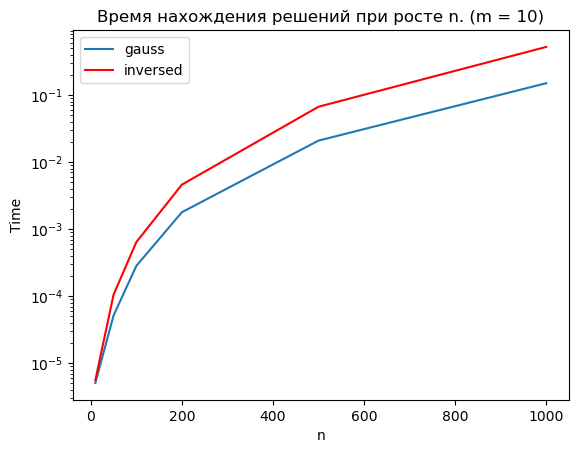

In [637]:
m = 10
n_values = [10, 50, 100, 200, 500, 1000]
gauss_times = []
inv_times = []
for n in n_values:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    X1 = %timeit -o np.linalg.solve(A, B)
    X2 = %timeit -o np.dot(np.linalg.inv(A), B)
    gauss_times.append(X1.best)
    inv_times.append(X2.best)

plt.semilogy(n_values, gauss_times, label='gauss')
plt.semilogy(n_values, inv_times, color='red', label='inversed')
plt.title('Время нахождения решений при росте n. (m = 10)')
plt.xlabel('n')
plt.ylabel('Time')
plt.legend()
plt.show()

296 µs ± 9.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
680 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
809 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.23 ms ± 8.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.22 ms ± 53.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 95.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.14 ms ± 89.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.4 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.2 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.41 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
30.8 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.6 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.7 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each

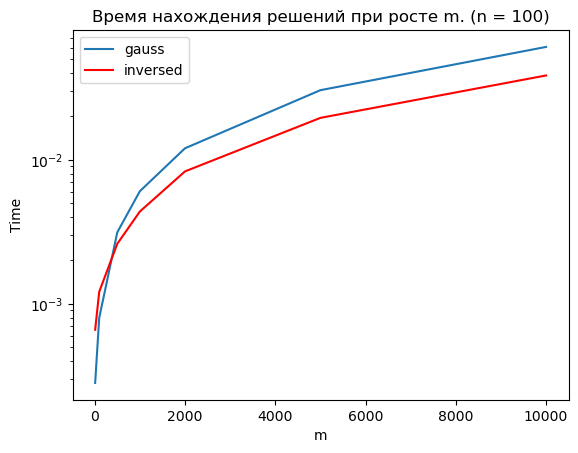

In [638]:
n1 = 100
m_values = [10, 100, 500, 1000, 2000, 5000, 10000]
gauss1_times = []
inv1_times = []
for m1 in m_values:
    A = np.random.rand(n1, n1)
    B = np.random.rand(n1, m1)
    X1 = %timeit -o np.linalg.solve(A, B)
    X2 = %timeit -o np.dot(np.linalg.inv(A), B)
    gauss1_times.append(X1.best)
    inv1_times.append(X2.best)

plt.semilogy(m_values, gauss1_times, label='gauss')
plt.semilogy(m_values, inv1_times, color='red', label='inversed')
plt.title('Время нахождения решений при росте m. (n = 100)')
plt.xlabel('m')
plt.ylabel('Time')
plt.legend()
plt.show()

При росте числа неизвестных и фиксированном (небольшом) числе правых частей Гаусс работает лучше, чем домножение на обратную. При маленьких числах правых частей и фиксированном (небольшом) числе неизвестных Гаусс всё ещё работает быстрее, но с ростом числа правых частей домножение на обратную начинает работать быстрее метода Гаусса.

1) Число операций у метода Гаусса:

Мы знаем, что Гаусс работает в прямом ходе за куб, а в обратном за квадрат. При элементарных преобразованиях I типа мы делаем (n + m) сложений и (n + m) умножений, т.е 2(n + m) операций, для II типа мы не делаем сложений/умножений/делений, для III типа (n + m) умножений. Дальше для вычитания первой строки из всех остальных нужно будет  $  2(n+m) \cdot (n-1)$ операций. Для второй строки в худшем случае нужно будет $ \\ 2((n-1)+(m-1)) \cdot ((n-1)-1)$  и т.д для каждой k-ой строки у которой  $2((n-k+1)+(m-k+1)) \cdot ((n-k+1)-1)$ операций.
Пользуясь этими соображениями и коспектами семинаров Димы (в частности самым первым) получим, что в прямом ходе алгоритма Гаусса у нас будет примерно $\frac{2}{3}n^3$ операций при росте n

2) Число операций у домножения на обратную:

Скажем что $>=\frac{2}{3}n^3$ т.к ищем обратную Гауссом и умножаем две матрицы

Тогда на первом графике у нас домножение на обратную при росте n требует больше операций, поэтому оно работает медленнее. 

На втором графике у нас фиксированно n, поэтому при росте m найти обратную к матрице $n \times n$ и перемножить $n \times n $ с $  m \times m$ становится выгоднее чем считать Гауссом

лаба крутая очень понравилось 